In [ ]:
1. VGGNet 이란?
2014년 세계 이미지 분류 대회(ImageNet Large Scale Visual Recognition Challenge)에서 준우승한 CNN 모델이다. 
간단한 구조로 좋은 성능을 내는 모델로 많이 응용되어 쓰이고 있다.

2. VGGNet 구성
총 6가지 구성의 VGGNet 모델이 있다. 그중 VGG16(D)과 VGG19(E)를 주로 사용한다.
VGGNet 모델에서는 3x3 필터를 사용하여 연산시 발생하는 파라미터의 개수가 줄어드는 효과를 볼 수 있다.
이로 인해 속도가 빨라지고 ReLU 함수가 들어갈 수 있는 곳이 많아진다는 장점이 있다.

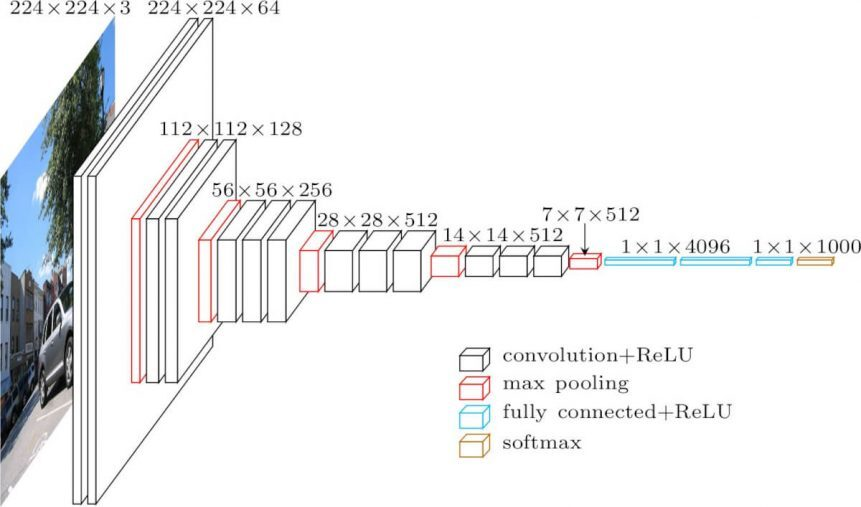

In [5]:
# 주피터 노트북에 이미지 삽입
from IPython.display import Image

# 3. VGG16 Architecture
Image("process.jpg")

In [6]:
# 4. VGG16 구현
import tensorflow as tf
from tensorflow.keras.applications import VGG16

model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.python.keras.preprocessing.image import img_to_array
from tensorflow.python.keras.applications.vgg16 import preprocess_input, decode_predictions

ModuleNotFoundError: No module named 'tensorflow.python.keras.preprocessing'

In [17]:

# VGG16 모델 
model = VGG16()

# 이미지 불러오기 
image = cv2.imread("FM.jpg")

# 이미지 전처리(자료형 변경)
image = img_to_array(image)
image = image.reshape((1, image.shape[0],image.shape[1],image.shape[2]))

# 모델에 넣어준다.
image = preprocess_input(image)  
print(image.shape)

# 예측(predict)
res = model.predict(image)
# 디코딩
label = decode_predictions(res)
print(label)
label = label[0][0]

# 출력
print()
print("%s (%.2f%%)" % (label[1], label[2]*100))
print()

for i in label:
    print(i)

NameError: name 'img_to_array' is not defined

이미지 크기는 224 X 224로 따로 resize 전처리를 해주지 않았다.
만약 224 X 224크기가 아니라면 resize 전처리가 필요하다.
VGG16 모델 사용 결과 개 사진을 넣었는데 개의 종류인 포메라니안을 예측하는 것을 볼 수 있다.